In [2]:
# import packages and mount google drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Load in the data by specifying its path
# (The path can be found by opening the folder icon on the left, right-clicking the file and selecting 'Copy path')
# https://www.kaggle.com/datasets/46688544dd912aa52724d499d2dc1d8fc3acaade8452211f2a81e0c2ebb92acc?resource=download
data = pd.read_csv('car_data(1).csv', delimiter=',')

In [10]:
data_numpy = data.drop(columns='Gender').to_numpy()

from sklearn.model_selection import train_test_split

# Filter your data into X and y and create your train-test split
X = data_numpy[:, [1,2]]
y = data_numpy[:, 3]

# The next cell assumes you use "X" as the name for your x data and "y" as the name for your y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




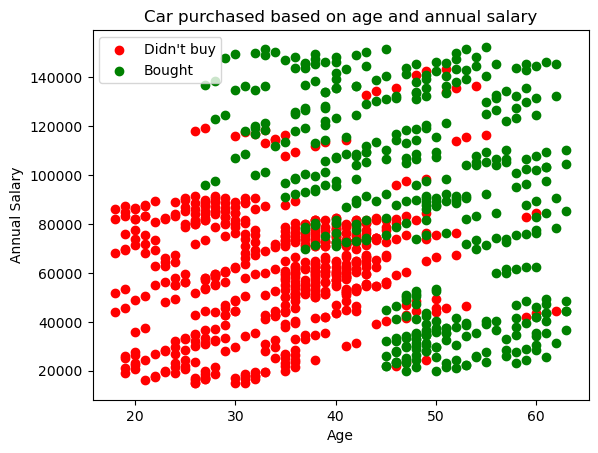

In [12]:
# Vizualize the data across a few axes:
indices_0 = np.where(y == 0)
indices_1 = np.where(y == 1)

X_didnt_buy = X[indices_0, :][0]
X_bought = X[indices_1, :][0]

plt.scatter(X_didnt_buy[:,0], X_didnt_buy[:,1], color='red', label='Didn\'t buy')
plt.scatter(X_bought[:,0], X_bought[:,1], color='green', label='Bought')
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.title('Car purchased based on age and annual salary')
plt.legend()

In [14]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
# Train your model
model = LogisticRegression(C=0.1, solver='liblinear', penalty='l1', max_iter=100)

model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [18]:
# Report the score of your model (how accurate was your model?)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.81


Text(0.5, 1.0, 'Car purchased based on age and annual salary')

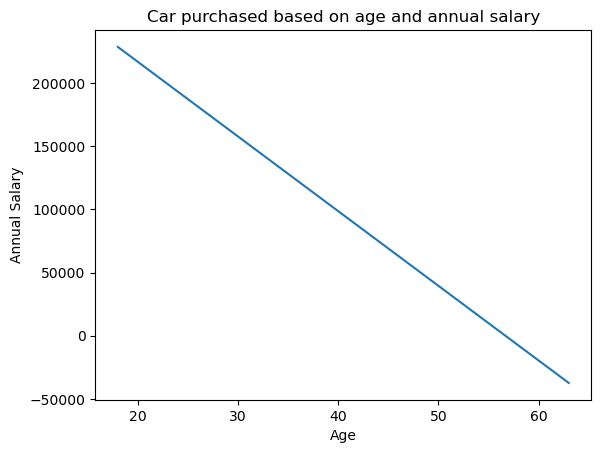

In [23]:
# Graph your model predictions

coefficients = model.coef_[0]
intercept = model.intercept_[0]
slope = -coefficients[0] / coefficients[1]
intercept = -intercept / coefficients[1]
x_values = np.array([X[:, 0].min(), X[:, 0].max()])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, label='Decision Boundary')


# X_didnt_buy = X[indices_0, :][0]
# X_bought = X[indices_1, :][0]

# plt.plot()

# plt.scatter(X_didnt_buy[:,0], X_didnt_buy[:,1], color='red', label='Didn\'t buy')
# plt.scatter(X_bought[:,0], X_bought[:,1], color='green', label='Bought')

plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.title('Car purchased based on age and annual salary')
# plt.legend()


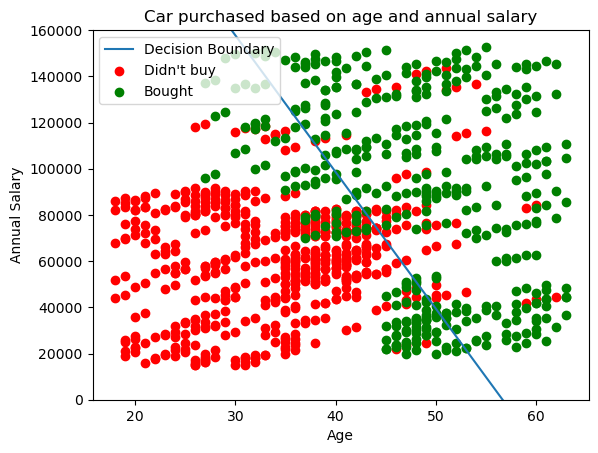

In [26]:
# Graph the initial data with the boundary line found from the model
#Hint: If you don't know how, Google it! The first result should provide you with the necessary code.
coefficients = model.coef_[0]
intercept = model.intercept_[0]
slope = -coefficients[0] / coefficients[1]
intercept = -intercept / coefficients[1]
x_values = np.array([X[:, 0].min(), X[:, 0].max()])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, label='Decision Boundary')


X_didnt_buy = X[indices_0, :][0]
X_bought = X[indices_1, :][0]


plt.scatter(X_didnt_buy[:,0], X_didnt_buy[:,1], color='red', label='Didn\'t buy')
plt.scatter(X_bought[:,0], X_bought[:,1], color='green', label='Bought')

plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.title('Car purchased based on age and annual salary')
plt.legend()
# Set the y-axis limit
plt.ylim(0, 160000)
plt.show()


In [ ]:
#if this does not work try converting to html instead of pdf, open the html file in your browser, and printing that as pdf
'''
    I learned how to use sklearn, LogisticRegression, train_test_split and Accuracy.
    In terms of difficulties, it simply the fact that I have had no experience with sklearn,
    but now that I have a background on it, moving forward with training models should be fine.
    Extracting the line from the model was also challenging.
'''